### Home Assigment 1, CMPE 252, Section 01, Spring 2023, San Jose State University
#### Informative Search using A* Algorithm and its comparison to uninformed search methods (BFS, Dijkstra)
All the required utility functions are provided at the beginning of this notebook. There are 8 tasks 
after the utility functions, and a bonus task (10 additional points to HW1, if solved correclty). **This assignment is individual**. The deadline is Feb 26, 2023, 11:59PM.The submission is in Canvas.

**please submit two separate files (not in a ZIP file) this notebook and its corresponding PDF (File->Download as -> PDF)**

import the necessary libraries

In [251]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import networkx as nx
import time
%matplotlib inline

'build_maze' builds the maze from 'maze_file.txt'.

In [187]:
def build_maze(maze_file):
    '''
    para1: filename of the maze txt file
    return mazes as a numpy array walls: 0 - no wall, 1 - wall in the maze
    '''
    a = open(maze_file, 'r')  
    m=[]
    for i in a.readlines():
        m.append(np.array(i.split(" "), dtype="int32"))
    return np.array(m)

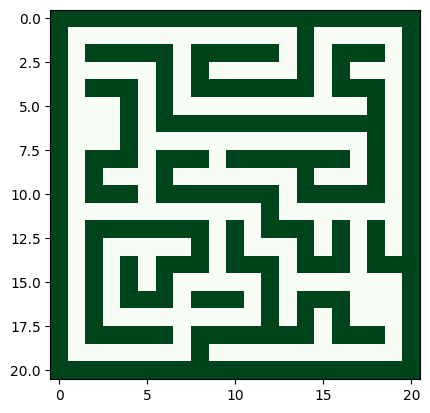

In [188]:
# (you are encouraged to look at the API of 'imshow')
plt.imshow(build_maze("maze_20x20.txt"), cmap='Greens')

# Task - 1

Build your maze with dimentions 25 x 25 and a similar complexity (number of obstacles/fences) 
as in the maze provided in 'maze_20x20.txt'. Check that there exists a path between START at the 
(1, 1) and the GOAL at (25, 25) in your maze. Store your maze to 'my_maze_25x25.txt'. Visualize your maze. 
Use your maze in the below tasks. 

***Visualize the maze***: 

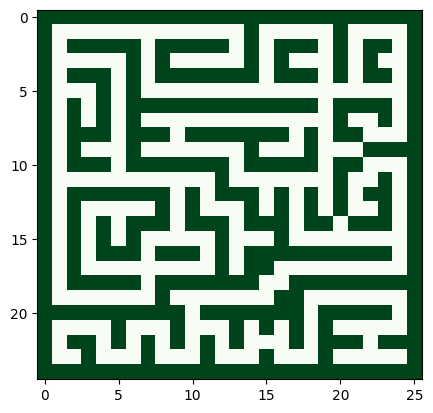

In [189]:
# (you are encouraged to look at the API of 'imshow')
plt.imshow(build_maze("my_maze_25x25.txt"), cmap='Greens')

define START and GOAL states within the maze

In [190]:
START=(1, 1)
GOAL=(23,24)
# Goal for 50X50 maze is (1,49)

'Find_the_edges' builds the graph for the maze, assuming that the robot can move only in the four directions (Up, Down, Right, Left).

In [191]:
def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

- ***gray cells*** means the walls of the maze
- ***dark green cells*** means the visited cells of the maze
- ***light green cells*** means the shortest path of the maze
- ***light brown*** means the unvisited cells of the maze

# Task - 2

A* algorithm requires a heuristic function. You will try two following heuristics:
- Euclidean distance between the cell coordinates
- Manhattan distance between the cell coordinates 

In [271]:
# implement the Euclidean and Manhattan distance between the 2 nodes, and update the code for A* accordingly

def Euclidean_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    '''
    return ((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)**0.5
    #pass

def Manhattan_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Manhattan distance between the 2 nodes
    '''
    #refer to https://xlinux.nist.gov/dads/HTML/manhattanDistance.html
    return abs(node1[0] - node2[0]) + abs(node1[1] - node2[1])
    #pass

Run A* with these two heuristic functions for W=1 and find the shortest path and its length in the maze. You can update the interface of astar_path to accept W and a heuristic function

***A**** ***-search*** 

In [272]:
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal, W, heuristic):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze1[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                priority = new_cost + W * heuristic(next, goal)
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [273]:
weights_euclidean = []
weights_manhattan = []
time_taken_euclidean = []
time_taken_manhattan = []
visited_nodes_euclidean = []
visited_nodes_manhattan = []

### A* search with Eucliedean distance as heuristic function

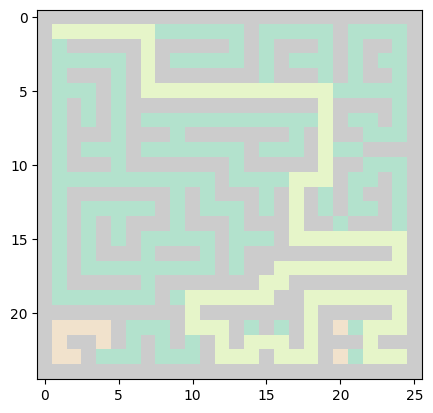

In [274]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1 = build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
W = 1

start_time= time.time()
came_from, path = astar_path(graph, START, GOAL, W, Euclidean_distance)

weights_euclidean.append(W)
time_taken_euclidean.append(time.time() - start_time)
visited_nodes_euclidean.append(len(came_from))


for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

### A* search with Manhattan distance as heuristic function

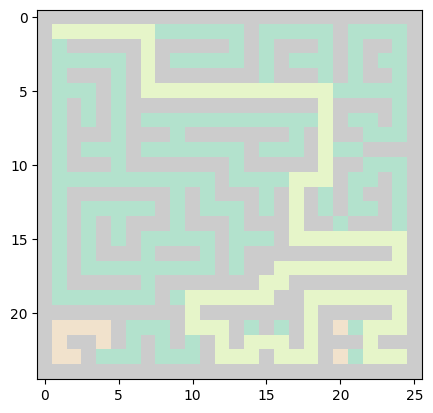

In [275]:
# A* search with Manhattan distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
W = 1

start_time= time.time()
came_from, path = astar_path(graph, START, GOAL, W, Manhattan_distance)

weights_manhattan.append(W)
time_taken_manhattan.append(time.time() - start_time)
visited_nodes_manhattan.append(len(came_from))


for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

# Task - 3


In this task you are asked to solve the maze with 4 different weights, W, in A* for each of the heurstic function mentioned above. Visualize the solution for each W and each heurstic on a separate plot in the same format as in the examle above (see cell 17). ***Chose a broad set of values for W to see the difference.***

A* Search | W => 0.1
 | Heuristic => Euclidean_distance

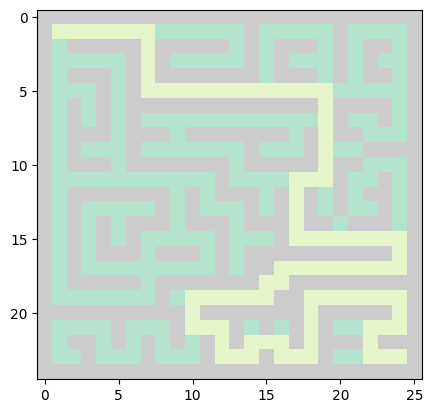

In [276]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
W = 0.1

start_time= time.time()
came_from, path = astar_path(graph, START, GOAL, W, Euclidean_distance)

weights_euclidean.append(W)
time_taken_euclidean.append(time.time() - start_time)
visited_nodes_euclidean.append(len(came_from))

for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* Search | W => 0.3
 | Heuristic => Euclidean_distance

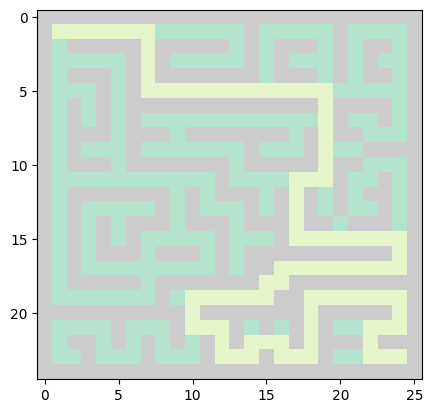

In [277]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
W = 0.3
start_time= time.time()
came_from, path = astar_path(graph, START, GOAL, W, Euclidean_distance)

weights_euclidean.append(W)
time_taken_euclidean.append(time.time() - start_time)
visited_nodes_euclidean.append(len(came_from))

for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* Search | W => 0.6
 | Heuristic => Euclidean_distance

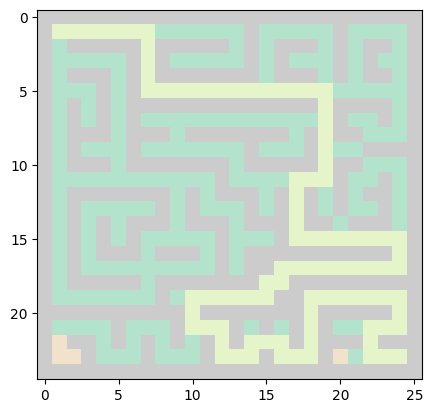

In [278]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
W = 0.6
start_time= time.time()
came_from, path = astar_path(graph, START, GOAL, W, Euclidean_distance)

weights_euclidean.append(W)
time_taken_euclidean.append(time.time() - start_time)
visited_nodes_euclidean.append(len(came_from))

for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* Search | W => 0.9
 | Heuristic => Euclidean_distance

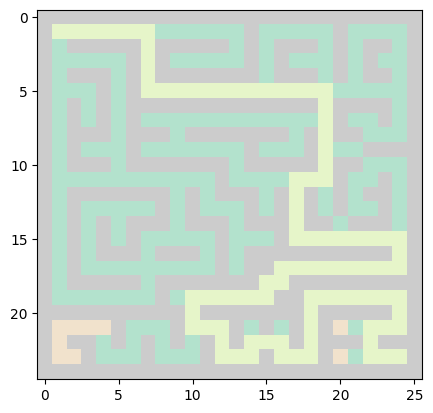

In [279]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
W = 0.9
start_time= time.time()
came_from, path = astar_path(graph, START, GOAL, W, Euclidean_distance)

weights_euclidean.append(W)
time_taken_euclidean.append(time.time() - start_time)
visited_nodes_euclidean.append(len(came_from))

for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* Search | W => 0.1
 | Heuristic => Manhattan_distance

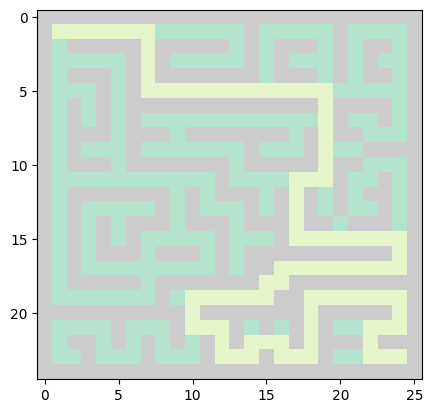

In [280]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
W = 0.1
start_time= time.time()
came_from, path = astar_path(graph, START, GOAL, W, Manhattan_distance)

weights_manhattan.append(W)
time_taken_manhattan.append(time.time() - start_time)
visited_nodes_manhattan.append(len(came_from))

for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* Search | W => 0.3
 | Heuristic => Manhattan_distance

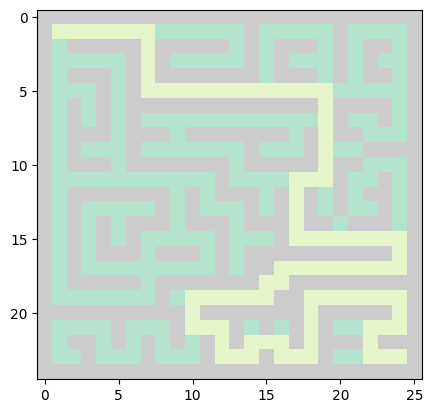

In [281]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
W = 0.3
start_time= time.time()
came_from, path = astar_path(graph, START, GOAL, W, Manhattan_distance)

weights_manhattan.append(W)
time_taken_manhattan.append(time.time() - start_time)
visited_nodes_manhattan.append(len(came_from))

for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* Search | W => 0.6
 | Heuristic => Manhattan_distance

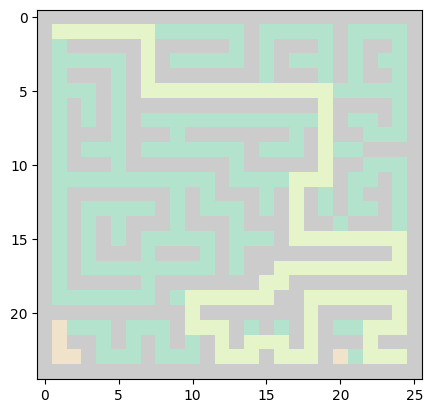

In [282]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
W = 0.6
start_time= time.time()
came_from, path = astar_path(graph, START, GOAL, W, Manhattan_distance)

weights_manhattan.append(W)
time_taken_manhattan.append(time.time() - start_time)
visited_nodes_manhattan.append(len(came_from))

for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* Search | W => 0.9
 | Heuristic => Manhattan_distance

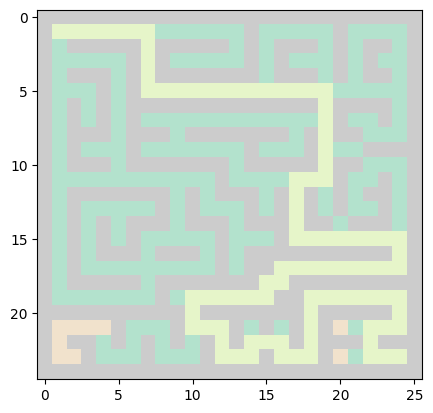

In [283]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
W = 0.9
start_time= time.time()
came_from, path = astar_path(graph, START, GOAL, W, Manhattan_distance)

weights_manhattan.append(W)
time_taken_manhattan.append(time.time() - start_time)
visited_nodes_manhattan.append(len(came_from))

for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

**Explain what changes you observe for the different weights and why it occurs.**

It is observed that as we increase weight, the number of states explored decrease for each heuristic function (Euclidean and Manhattan ).

# Task - 4


Plot on plt.subplot(121) a) time taken VS Weights

Plot on plt.subplot(122) b) search space (expanded nodes) VS Weights

-- add titles, axis labels, and legends.

For Euclidean Heuristic function

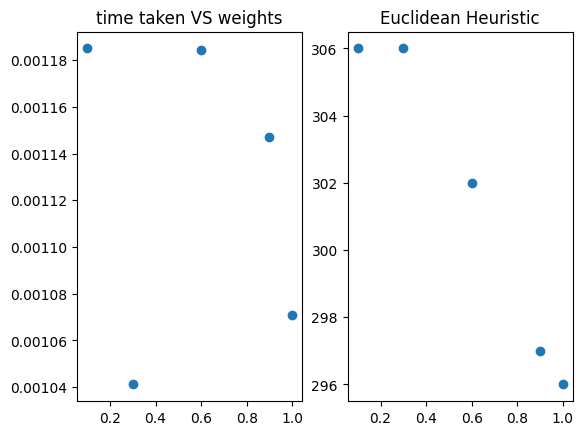

In [298]:
fig = plt.figure()
fig.add_subplot(121, title = "time taken VS weights")
plt.scatter(weights_euclidean, time_taken_euclidean)
fig.add_subplot(122, title = "search space VS weights")
plt.scatter(weights_euclidean, visited_nodes_euclidean)
plt.title(label="Euclidean Heuristic")
plt.show()

For Manhattan Heuristic function

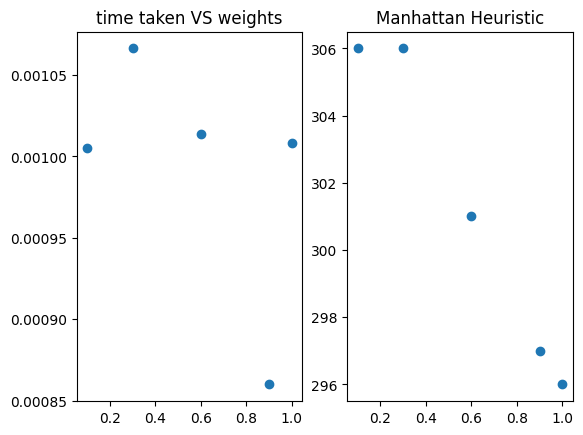

In [299]:
fig = plt.figure()
fig.add_subplot(121, title = "time taken VS weights")
plt.scatter(weights_manhattan, time_taken_manhattan)
fig.add_subplot(122, title = "search space VS weights")
plt.scatter(weights_manhattan, visited_nodes_manhattan)
plt.title(label="Manhattan Heuristic")
plt.show()

# Task - 5

Solve the maze with the Dijkstra algorithm, and visualize the solution in the maze. What is the length of the shortest path?

***Dijkstra Algorithm***

In [204]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph 
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    unvisited_nodes = list(graph.keys())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1 
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != start_node: 
        path.append(current)
        #print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(start_node) 
    path.reverse() 
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    


'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

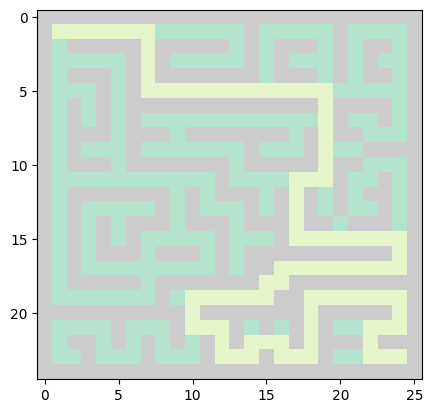

In [205]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
previous_nodes, path = dijkstra_algorithm(graph, START, GOAL)
for i in previous_nodes:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')


In [206]:
print("Length of shortest path via Dijkstras : ",len(path))

Length of shortest path via Dijkstras :  92


# Task - 6

Solve the maze with the BFS algorithm, and visualize the solution in the maze. What is the length of the shortest path?

***Breadth First Search (BFS)***

In [207]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()
    
    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        #print(current, graph[current])
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    return None
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

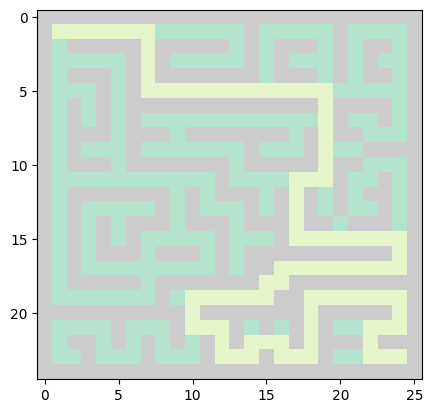

In [208]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
#print(graph)
visited, path = BreadthFirst(graph, START, GOAL)
#print(visited, path)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

In [209]:
print("Length of shortest path via BFS : ",len(path))

Length of shortest path via BFS :  92


# Task - 7

Choose 3 random START and GOAL states, and repeat the tasks 2 - 6, and visualize the solution for each. Use W=1 in this task. Explain your observations.

In [210]:
START1, GOAL1 = (1, 1), (15, 7)
START2, GOAL2 = (15, 7), (23, 24)
START3, GOAL3 = (1, 15), (1, 23)

A* search with Euclidean distance as heuristic function


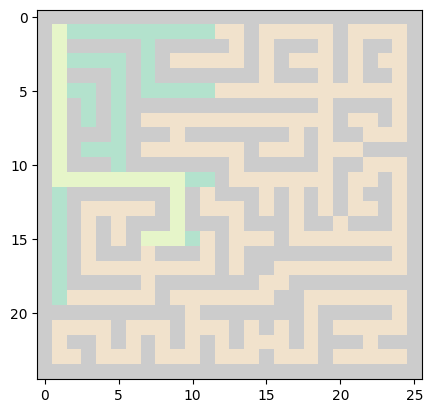

In [211]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
W = 1
came_from, path = astar_path(graph, START1, GOAL1, W, Euclidean_distance)
for i in came_from:
    maze1[i[0],i[1]]=-3
    
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

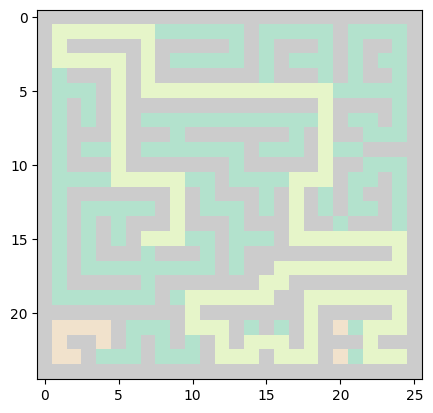

In [212]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
W = 1
came_from, path = astar_path(graph, START2, GOAL2, W, Euclidean_distance)
for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

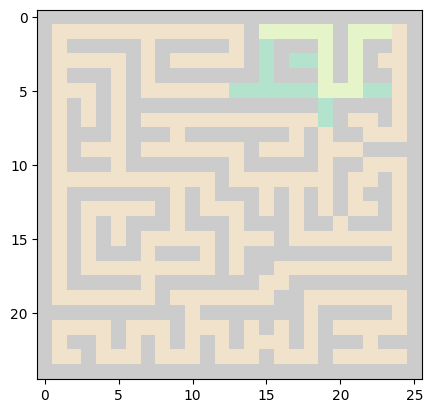

In [213]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
W = 1
came_from, path = astar_path(graph, START3, GOAL3, W, Euclidean_distance)
for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* search with Manhattan distance as heuristic function


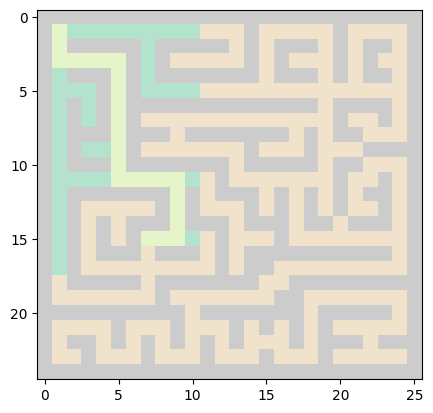

In [215]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
W = 1
came_from, path = astar_path(graph, START1, GOAL1, W, Manhattan_distance)
for i in came_from:
    maze1[i[0],i[1]]=-3
    
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

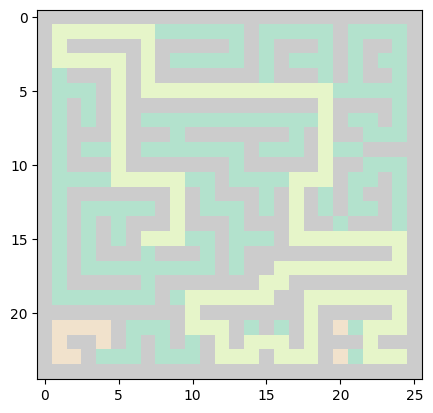

In [216]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
W = 1
came_from, path = astar_path(graph, START2, GOAL2, W, Manhattan_distance)
for i in came_from:
    maze1[i[0],i[1]]=-3
    
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

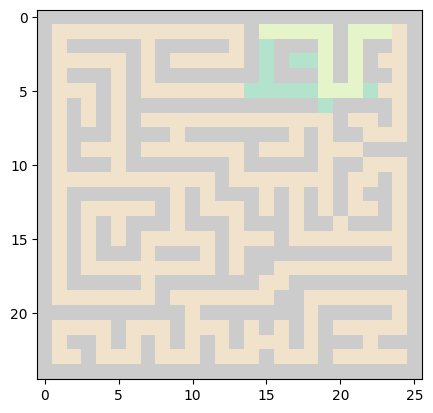

In [217]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
W = 1
came_from, path = astar_path(graph, START3, GOAL3, W, Manhattan_distance)
for i in came_from:
    maze1[i[0],i[1]]=-3
    
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

Dijkstra's Algorithm

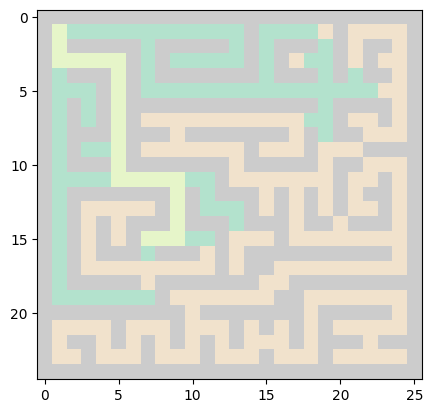

In [218]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
previous_nodes, path = dijkstra_algorithm(graph, START1, GOAL1)
for i in previous_nodes:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')


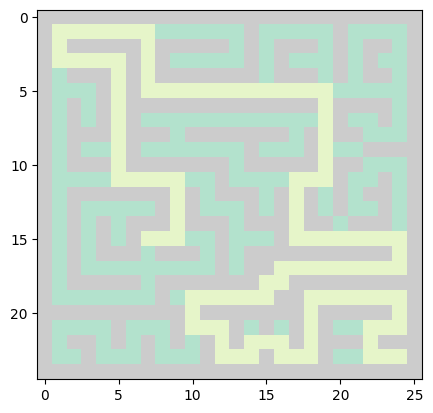

In [219]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
previous_nodes, path = dijkstra_algorithm(graph, START2, GOAL2)
for i in previous_nodes:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')


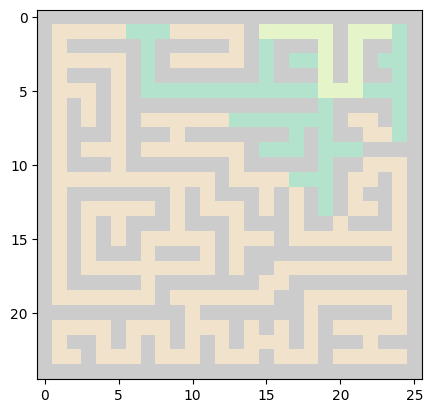

In [220]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
previous_nodes, path = dijkstra_algorithm(graph, START3, GOAL3)
for i in previous_nodes:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')


BFS

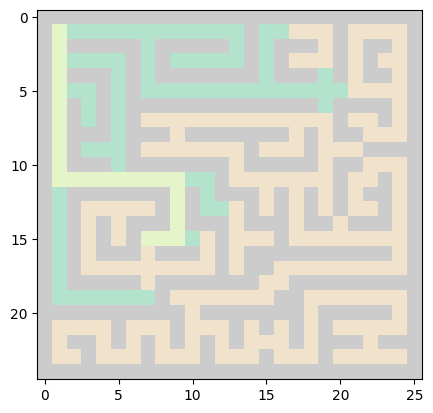

In [221]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START1, GOAL1)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

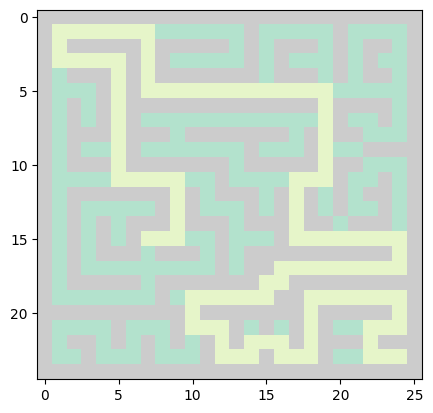

In [222]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START2, GOAL2)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

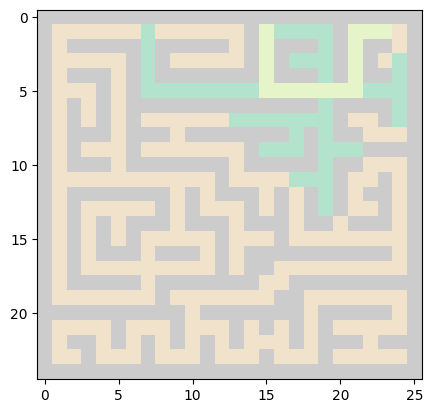

In [223]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START3, GOAL3)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

# Task - 8

The initally assumation which we made in the Find_the_edges() is the robot can only move in UP, DOWN, LEFT and RIGHT. Now it can move diagonally as well. Modifiy the function and repeat the tasks 1-6 (and visualize the solution for each). Use W=1 in this task (non need in **"Chose a broad set of values for W to see the difference"**). Explain your observations

In [234]:
def Find_the_edges_2(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''

    graph={}
    directions = [(-1,0), (1,0), (0,-1), (0,1), (-1,-1), (-1,1), (1,-1),(1,1)]

    valid = lambda x,y : 0<=x<len(maze[0]) and 0<=y<len(maze)

    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]

                for a,b in directions:
                    if valid(i+a, j+b): 
                        eles.append((i+a, j+b))

                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)] = adj
    return graph

In [300]:
weights_euclidean, weights_manhattan = [], []
time_taken_euclidean, time_taken_manhattan = [], []
visited_nodes_euclidean, visited_nodes_manhattan = [], []

A* Search | W => 1 
 | Heuristic => Euclidean_distance

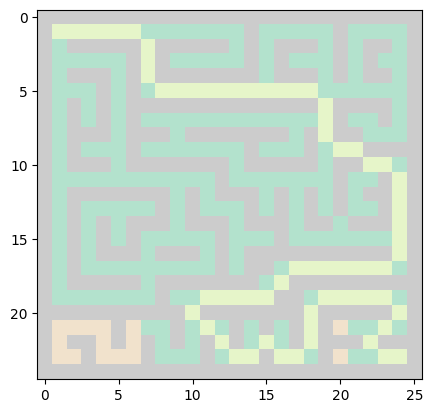

In [301]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges_2(maze1)
W = 1
start_time = time.time()
came_from, path = astar_path(graph, START, GOAL, W, Euclidean_distance)
weights_euclidean.append(W)
time_taken_euclidean.append(time.time() - start_time)
visited_nodes_euclidean.append(len(came_from))
for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* Search | W => 1 
 | Heuristic => Manhattan_distance

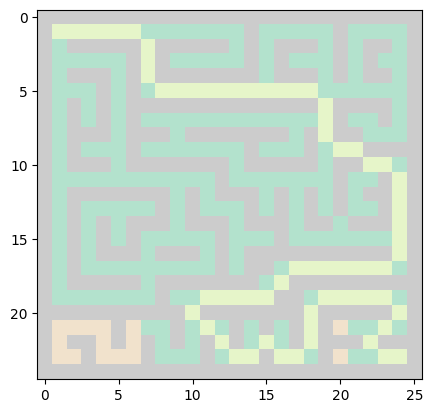

In [302]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges_2(maze1)
W = 1
start_time = time.time()
came_from, path = astar_path(graph, START, GOAL, W, Manhattan_distance)
weights_manhattan.append(W)
time_taken_manhattan.append(time.time() - start_time)
visited_nodes_manhattan.append(len(came_from))
for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* Search | W => 0.1
 | Heuristic => Euclidean_distance

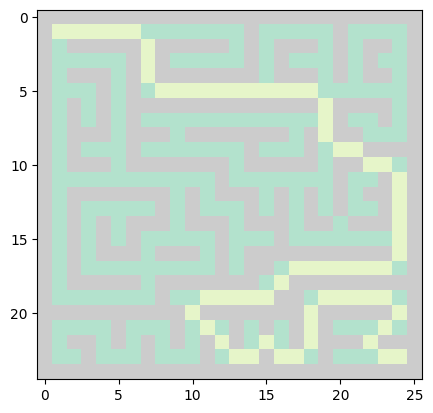

In [303]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges_2(maze1)
W = 0.1
start_time = time.time()
came_from, path = astar_path(graph, START, GOAL, W, Euclidean_distance)
weights_euclidean.append(W)
time_taken_euclidean.append(time.time() - start_time)
visited_nodes_euclidean.append(len(came_from))
for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* Search | W => 0.3
 | Heuristic => Euclidean_distance

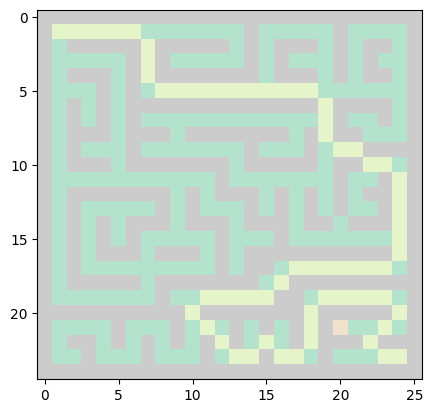

In [304]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges_2(maze1)
W = 0.3
start_time = time.time()
came_from, path = astar_path(graph, START, GOAL, W, Euclidean_distance)
weights_euclidean.append(W)
time_taken_euclidean.append(time.time() - start_time)
visited_nodes_euclidean.append(len(came_from))
for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* Search | W => 0.6
 | Heuristic => Euclidean_distance

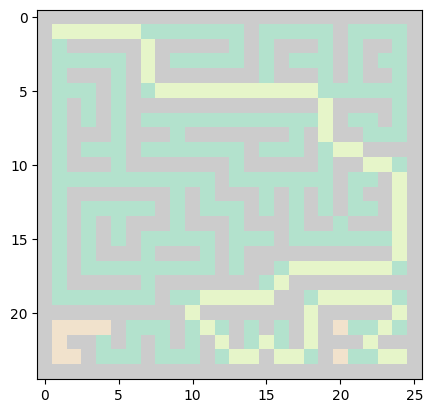

In [305]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges_2(maze1)
W = 0.6
start_time = time.time()
came_from, path = astar_path(graph, START, GOAL, W, Euclidean_distance)
weights_euclidean.append(W)
time_taken_euclidean.append(time.time() - start_time)
visited_nodes_euclidean.append(len(came_from))
for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* Search | W => 0.9
 | Heuristic => Euclidean_distance

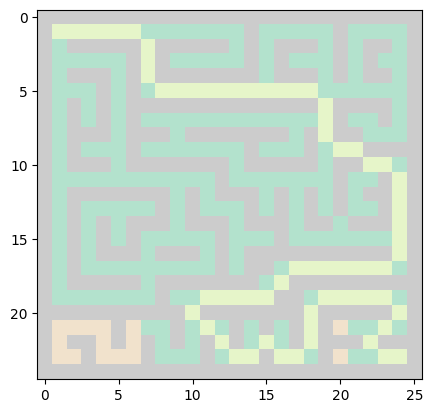

In [306]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges_2(maze1)
W = 0.9
start_time = time.time()
came_from, path = astar_path(graph, START, GOAL, W, Euclidean_distance)
weights_euclidean.append(W)
time_taken_euclidean.append(time.time() - start_time)
visited_nodes_euclidean.append(len(came_from))
for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* Search | W => 0.1
 | Heuristic => Manhattan_distance

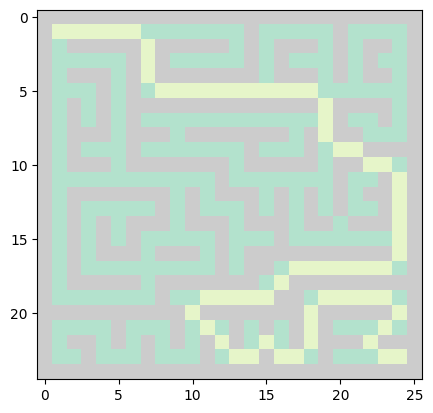

In [307]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges_2(maze1)
W = 0.1
start_time = time.time()
came_from, path = astar_path(graph, START, GOAL, W, Manhattan_distance)
weights_manhattan.append(W)
time_taken_manhattan.append(time.time() - start_time)
visited_nodes_manhattan.append(len(came_from))
for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* Search | W => 0.3
 | Heuristic => Manhattan_distance

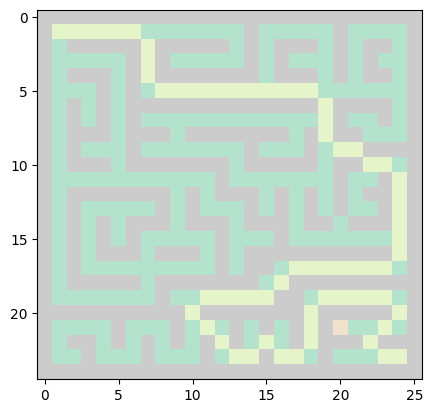

In [308]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges_2(maze1)
W = 0.3
start_time = time.time()
came_from, path = astar_path(graph, START, GOAL, W, Manhattan_distance)
weights_manhattan.append(W)
time_taken_manhattan.append(time.time() - start_time)
visited_nodes_manhattan.append(len(came_from))
for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* Search | W => 0.6
 | Heuristic => Manhattan_distance

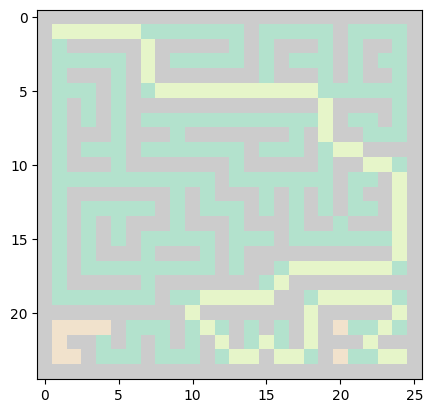

In [309]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges_2(maze1)
W = 0.6
start_time = time.time()
came_from, path = astar_path(graph, START, GOAL, W, Manhattan_distance)
weights_manhattan.append(W)
time_taken_manhattan.append(time.time() - start_time)
visited_nodes_manhattan.append(len(came_from))
for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

A* Search | W => 0.9
 | Heuristic => Manhattan_distance

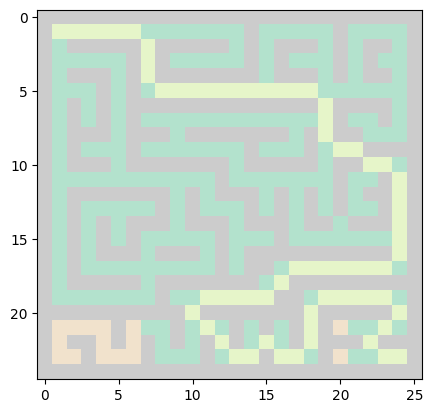

In [310]:
# A* search with Eucliedean distance as heuristic function
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges_2(maze1)
W = 0.9
start_time = time.time()
came_from, path = astar_path(graph, START, GOAL, W, Manhattan_distance)
weights_manhattan.append(W)
time_taken_manhattan.append(time.time() - start_time)
visited_nodes_manhattan.append(len(came_from))
for i in came_from:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')

For Euclidean Heuristic function


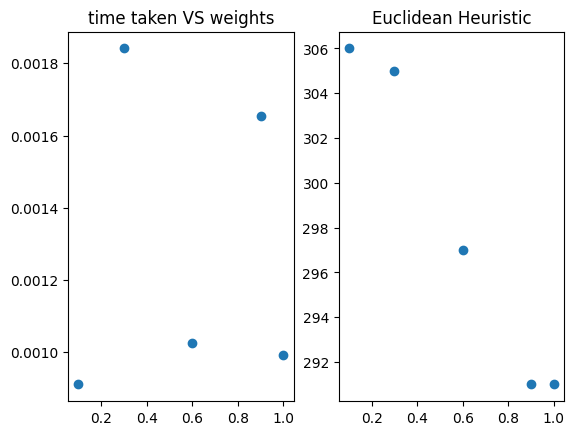

In [311]:
fig = plt.figure()
fig.add_subplot(121, title = "time taken VS weights")
plt.scatter(weights_euclidean, time_taken_euclidean)
fig.add_subplot(122, title = "search space VS weights")
plt.scatter(weights_euclidean, visited_nodes_euclidean)
plt.title(label="Euclidean Heuristic")
plt.show()

For Manhattan Heuristic function

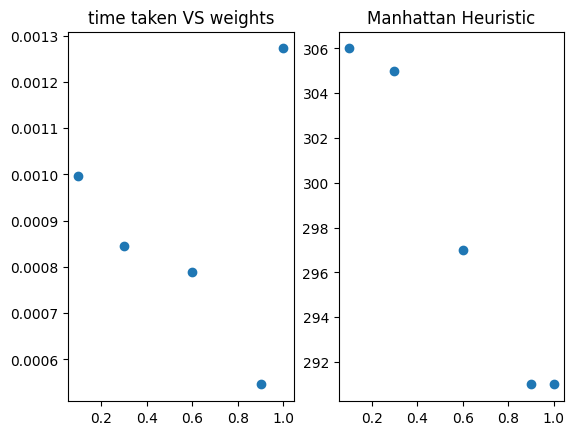

In [312]:
fig = plt.figure()
fig.add_subplot(121, title = "time taken VS weights")
plt.scatter(weights_manhattan, time_taken_manhattan)
fig.add_subplot(122, title = "search space VS weights")
plt.scatter(weights_manhattan, visited_nodes_manhattan)
plt.title(label="Manhattan Heuristic")
plt.show()

Dijkstra's Algorithm

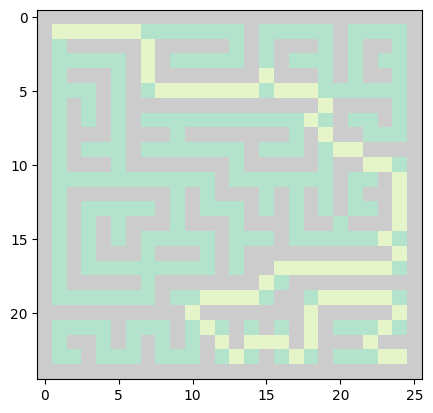

In [245]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges_2(maze1)
previous_nodes, path = dijkstra_algorithm(graph, START, GOAL)
for i in previous_nodes:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')


BFS

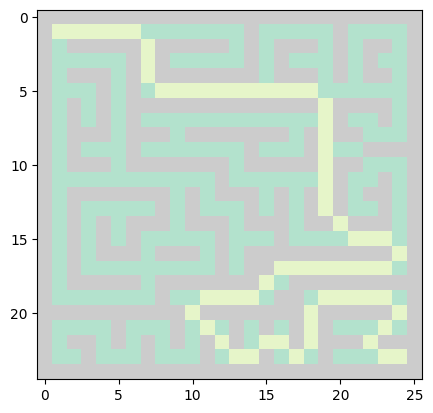

In [246]:
maze1=build_maze("my_maze_25x25.txt")
graph=Find_the_edges_2(maze1)
previous_nodes, path = BreadthFirst(graph, START, GOAL)
for i in previous_nodes:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

plt.imshow(maze1, cmap='Pastel2')


For a maze where travelling diagonal nodes is allowed for the agent, a shorter path length is required to traverse from start to goal node wrt to corresponding path using the same algorithm when travelling to diagonal nodes is not allowed.


# Bonus Task (10 pt): Solving "Sliding Tile Puzzle" with A*-Search
the initial and the final configurations are given at the image below. 
you can use **the number of displaced tiles** as a heuristics function, $h_1$. Use W=1
add you code and print the optimal action sequence (which tile to move) from the intial to the final configuration.
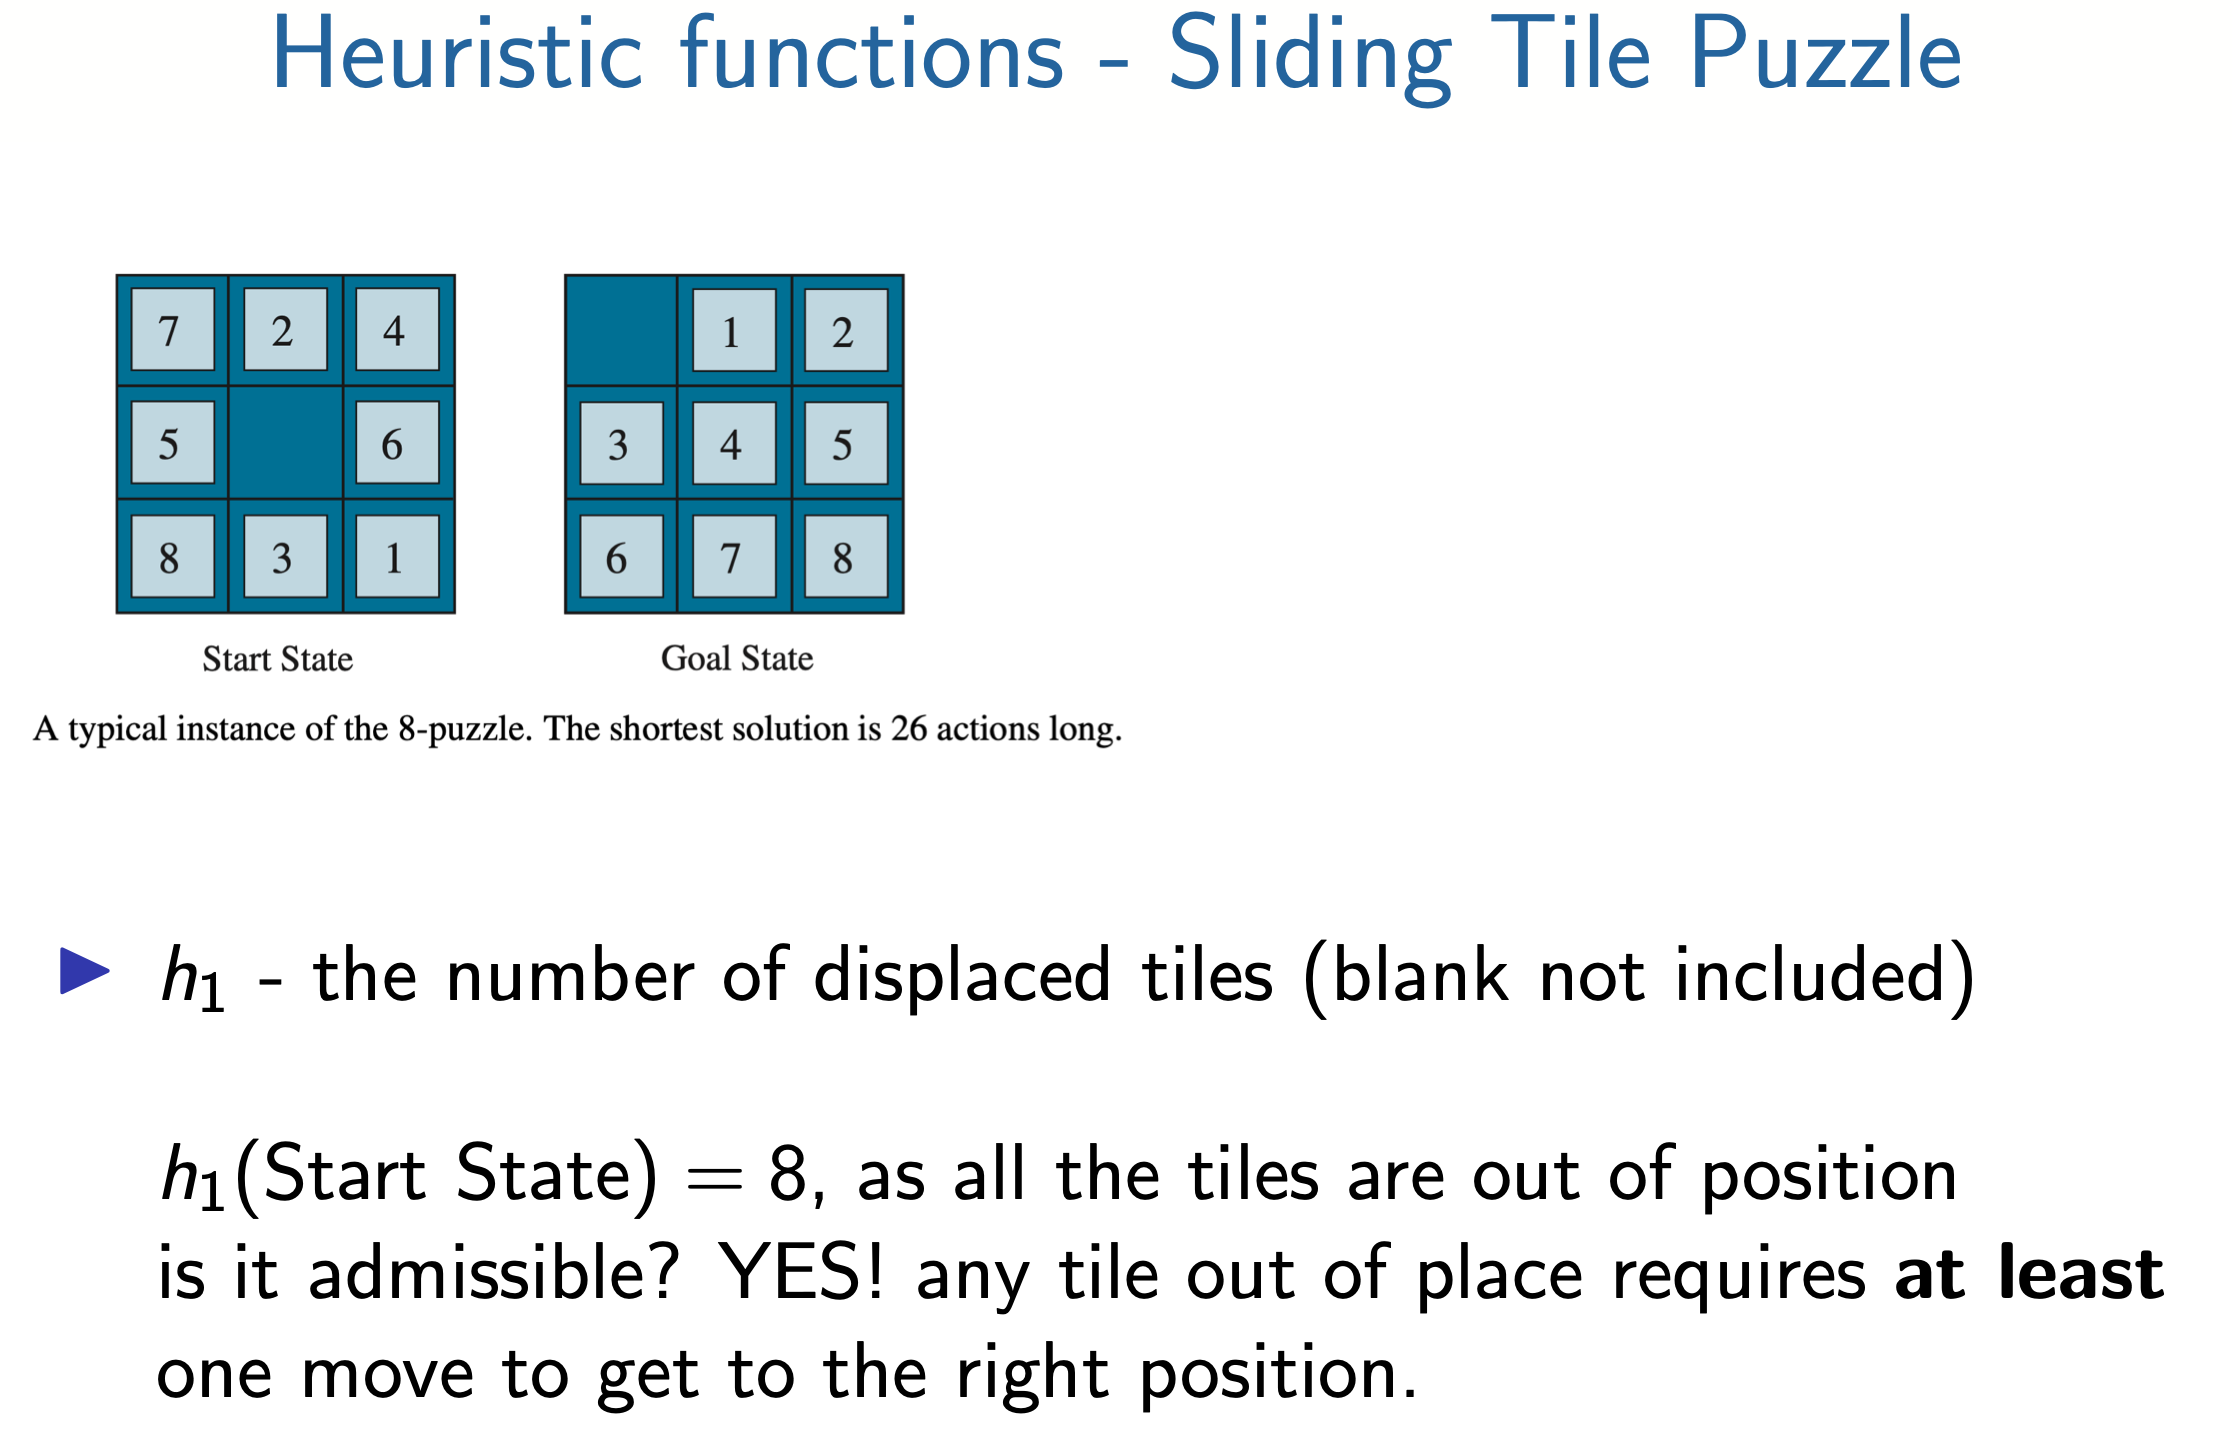